### Mark Hoogendoorn and Burkhardt Funk (2017)              
Machine Learning for the Quantified Self               
Springer,
Chapter 2    

In [2]:
from datetime import datetime
from util.VisualizeDataset import VisualizeDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plot
%matplotlib inline 

In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
DataViz = VisualizeDataset()

In [5]:
# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = 'intermediate_datafiles/'
try:
    dataset = pd.read_csv(dataset_path + 'all_data_converted.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

dataset.index = pd.to_datetime(dataset.index, format='%Y-%m-%d %H:%M:%S.%f')

# Compute the number of milliseconds covered by an instane based on the first two rows
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

In [6]:
# creating sum of squares attributes from accelerometer and gyroscope data
acc_r = (dataset['acc_x']**2+dataset['acc_y']**2+dataset['acc_z']**2)
gyr_r = (dataset['gyr_x']**2+dataset['gyr_y']**2+dataset['gyr_z']**2)
dataset['acc_r'] = np.sqrt(acc_r)
dataset['gyr_r'] = np.sqrt(gyr_r)

In [7]:
#split the dataset into the seperate exercises
squat = dataset[(dataset.labelSquat == 1)]
bench = dataset[(dataset.labelBenchPress == 1)]
ohp = dataset[(dataset.labelOHP == 1)]
deadlift = dataset[(dataset.labelDeadlift == 1)]
row = dataset[(dataset.labelRow == 1)]

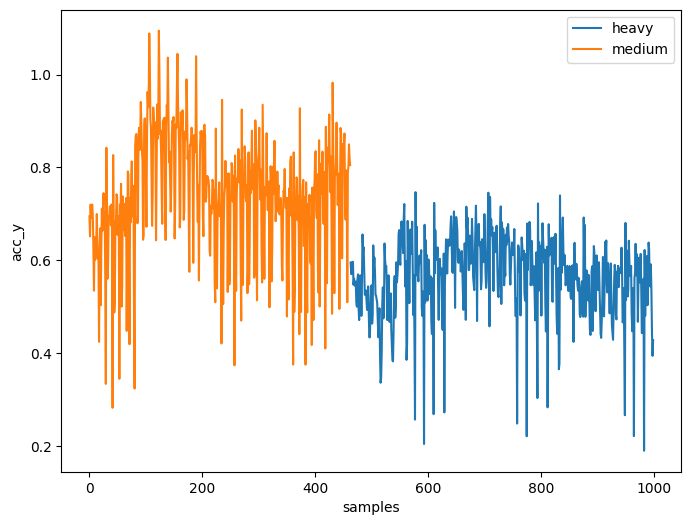

In [8]:
# Difference between heavy and medium weight squats
feature = 'acc_y'
exercise = 'Squat'
fig, ax = plot.subplots(figsize=(8,6))
squat[:1000].reset_index().groupby(['category'])[feature].plot(legend=True)
ax.set_ylabel(feature)
ax.set_xlabel('samples')
plot.show()

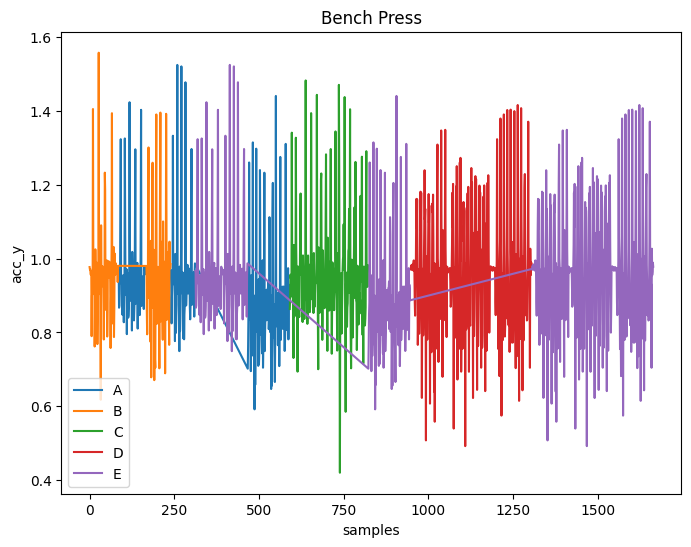

In [9]:
# Bench Press sets
feature = 'acc_y'
exercise = 'Bench Press'
fig, ax = plot.subplots(figsize=(8,6))
bench.reset_index().groupby(['participant'])[feature].plot(title=exercise, legend=True)
ax.set_xlabel('samples')
ax.set_ylabel(feature)
plot.show()

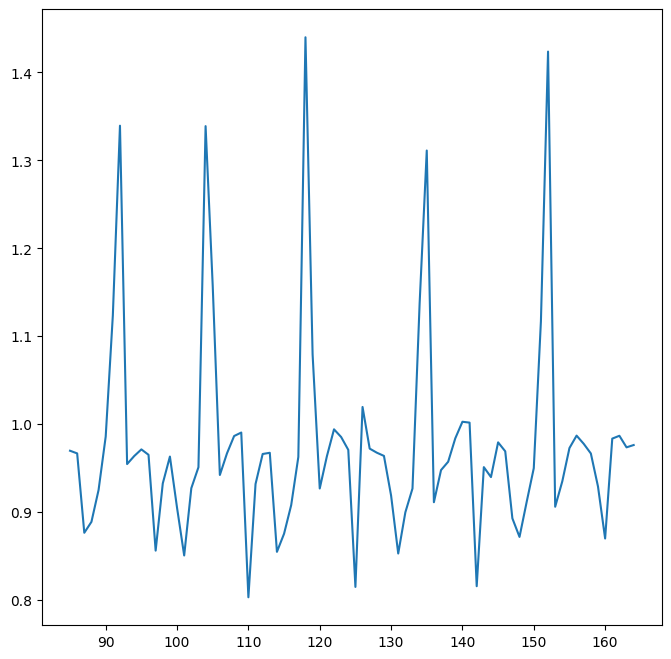

In [10]:
# Graph of a heavy bench press set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
bench.reset_index()['acc_r'][85:165].plot()
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

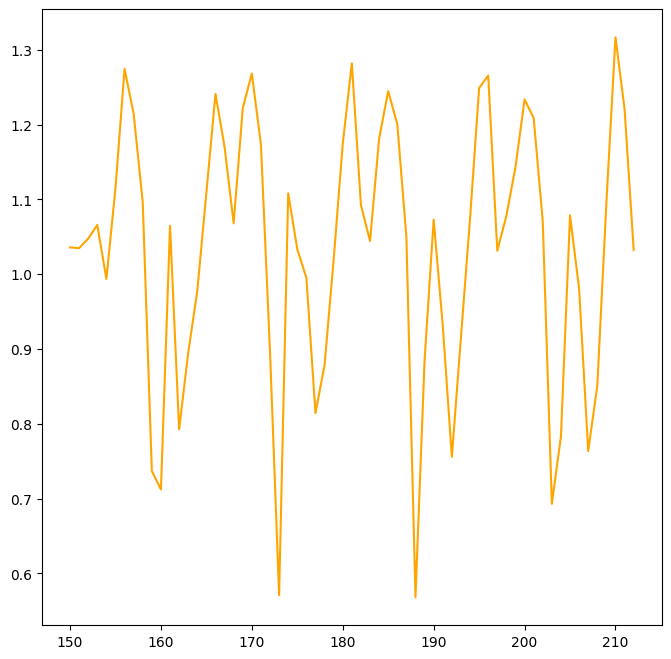

In [11]:
# Graph of a heavy deadlift set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
deadlift.reset_index()['acc_r'][150:213].plot(color='orange')
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

In [12]:
ohp.reset_index()['acc_r'][600:652]

600    0.888235
601    0.782637
602    0.744577
603    0.818017
604    0.916836
605    1.020185
606    1.188129
607    1.524754
608    1.118785
609    0.908640
610    0.849026
611    0.857289
612    0.651278
613    0.842048
614    0.927603
615    0.970553
616    1.176199
617    1.553659
618    1.098905
619    0.913729
620    0.922200
621    0.891494
622    0.703871
623    0.772370
624    0.886942
625    0.952613
626    1.019300
627    1.239082
628    1.481683
629    1.001678
630    0.881559
631    0.869926
632    0.739811
633    0.736260
634    0.827051
635    0.910633
636    1.040942
637    1.282137
638    1.413594
639    1.006940
640    0.946410
641    0.932516
642    0.806705
643    0.726453
644    0.760688
645    0.891715
646    0.952041
647    1.192242
648    1.467172
649    1.123883
650    0.960751
651    0.904087
Name: acc_r, dtype: float64

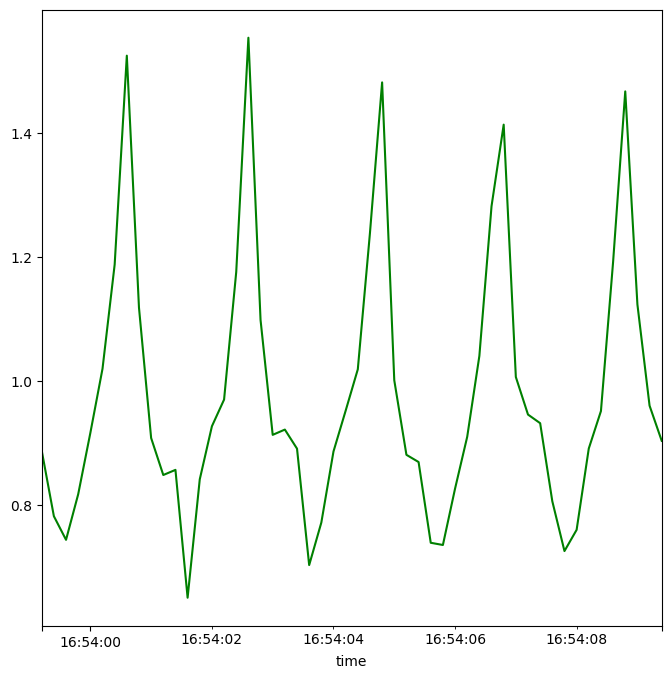

In [13]:
# Graph of a overhead press set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
ohp['acc_r'][600:652].plot(color='green')
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

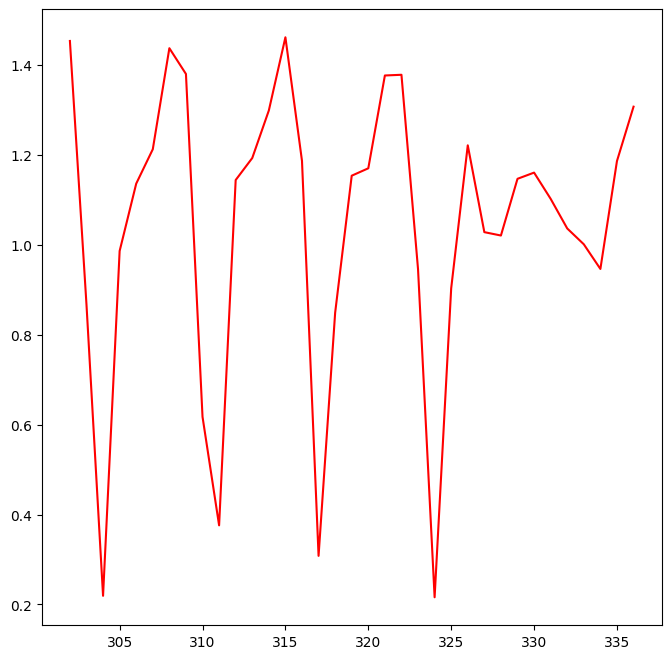

In [14]:
# Graph of a barbell row set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
row.reset_index()['acc_r'][302:337].plot(color='red')
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

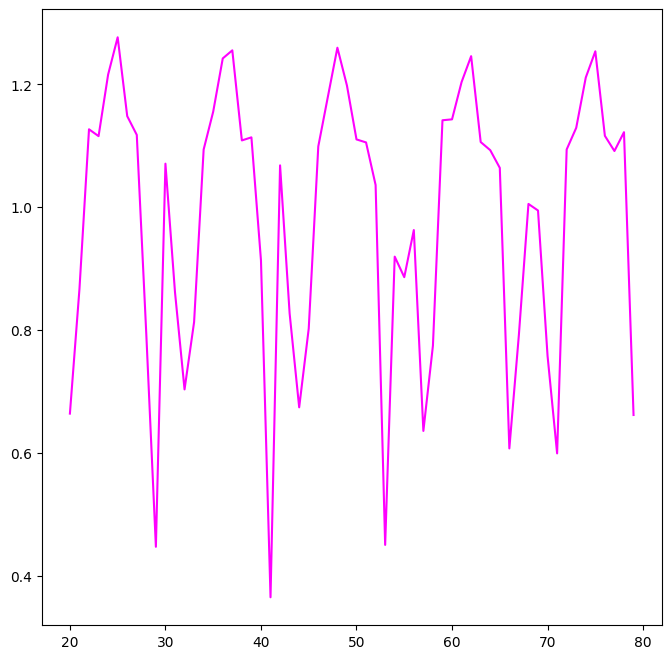

In [15]:
# Graph of a heavy squat set (5 reps)
fig, ax = plot.subplots(figsize=(8,8))
squat.reset_index()['acc_r'][20:80].plot(color='magenta')
# ax.set_xlabel('samples')
# ax.set_ylabel('Acceleration')
plot.show()

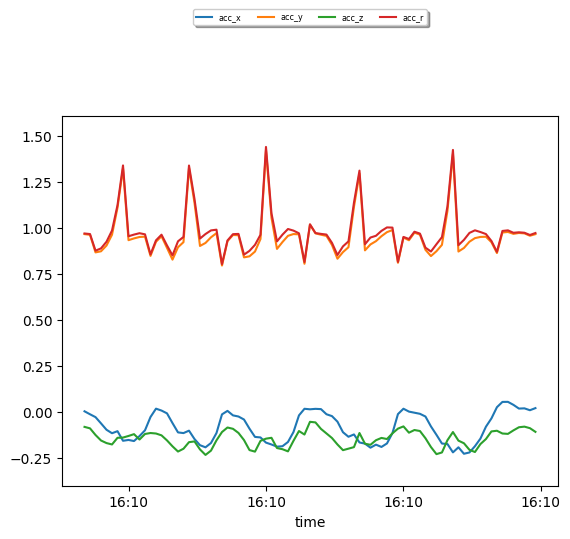

In [16]:
DataViz.plot_dataset(bench[bench.set == bench.set.unique()[1]], ['acc_'], ['like'], ['line'])

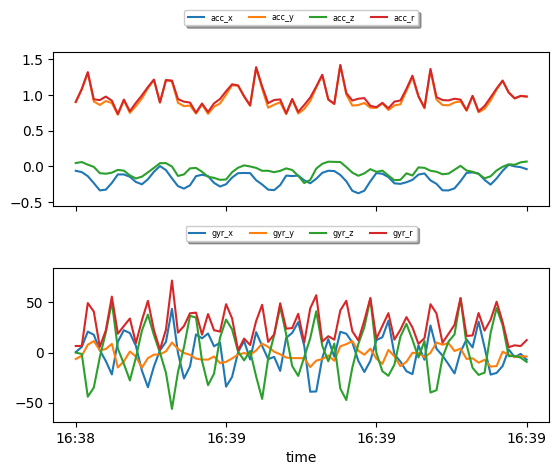

In [17]:
DataViz.plot_dataset(ohp[ohp.set == ohp.set.unique()[0]], ['acc_', 'gyr_'], ['like', 'like'], ['line', 'line'])

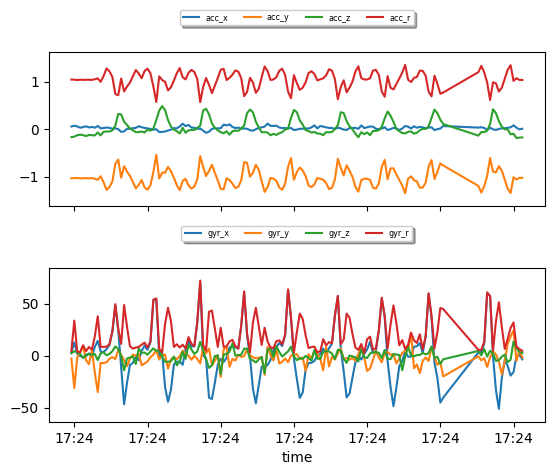

In [18]:
DataViz.plot_dataset(deadlift[deadlift.set == deadlift.set.unique()[0]], ['acc_', 'gyr_'], ['like', 'like'], ['line', 'line'])

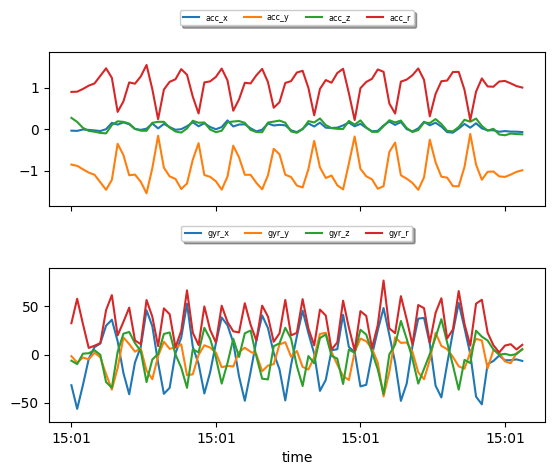

In [19]:
DataViz.plot_dataset(row[row.set == row.set.unique()[0]], ['acc_', 'gyr_'], ['like', 'like'], ['line', 'line'])

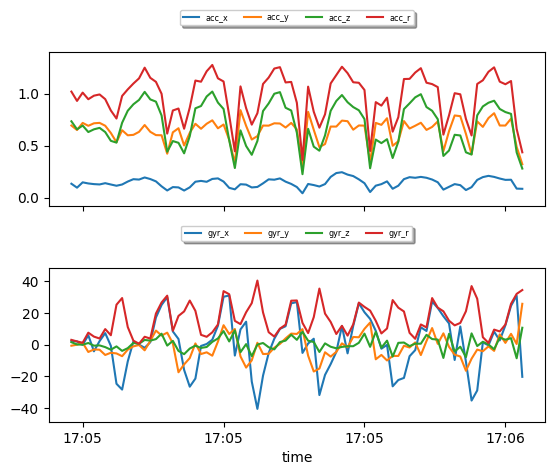

In [20]:
DataViz.plot_dataset(squat[squat.set == squat.set.unique()[0]], ['acc_', 'gyr_'], ['like', 'like'], ['line', 'line'])